<a href="https://colab.research.google.com/github/denniss83/Online_Retail_Satis_Analizi/blob/main/Online_Retail_Sat%C4%B1%C5%9F_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ Online Retail Satış Analizi (2010–2011)

Bu projede, Birleşik Krallık merkezli bir online perakende şirketine ait 2010–2011 yılları arasındaki işlem verileri analiz edilmiştir. Amaç; ürün, müşteri ve zaman bazlı satış davranışlarını keşfetmek ve ticari içgörüler elde etmektir.

**Veri Kaynağı:**  
Kaggle – [Online Retail Dataset by Bojan Tunguz](https://www.kaggle.com/datasets/tunguz/online-retail)

> ⚠️ **Uyarı:** **Bu çalışma python ile veri analizi öğrenimi kapsamında eğitim amaçlı gerçekleştirilmiştir. Gerçek bir danışmanlık ya da ticari karar desteği amacıyla kullanılmamalıdır.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail.csv to online_retail (1).csv


## 📁 Veri Temizliği ve Hazırlık

Veri setindeki eksik değerler, negatif satışlar ve açıklama boşlukları temizlenmiştir.

In [3]:
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print("\n🔹 Veri Boyutu:", df.shape)


🔹 Veri Boyutu: (541909, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
display(df.describe())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
print("Eksik Değerler:\n")
print(df.isnull().sum())

Eksik Değerler:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
negative_qty = df[df['Quantity'] < 0]
print(f"\n🔴 İade edilen işlem sayısı: {negative_qty.shape[0]}")


🔴 İade edilen işlem sayısı: 10624


In [9]:
df_clean = df.dropna(subset=['CustomerID', 'Description'])
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [10]:
print("Temiz veri boyutu:", df_clean.shape)
df_clean.head()

Temiz veri boyutu: (397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
print("Temizlenmiş veride eksik değer kontrolü:\n")
print(df_clean.isnull().sum())

Temizlenmiş veride eksik değer kontrolü:

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


# 📊 A. Genel Satış Analizi

Bu bölümde en çok satan ürünler, en çok kazandıran ürünler ve ülkelere göre satış dağılımı incelenmiştir.


## Toplam Satış Tutarı

In [12]:
total_revenue = df_clean['TotalPrice'].sum()
print(f"💰 Toplam Satış Tutarı: £{total_revenue:,.2f}")

💰 Toplam Satış Tutarı: £8,911,407.90


##En Çok Satılan Ürünler (Quantity bazlı)

In [13]:
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
display(top_products)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


 ## En Çok Gelir Getiren Ürünler (TotalPrice bazlı)

In [14]:
top_revenue_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
display(top_revenue_products)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


## Ülkelere Göre Satış Dağılımı

In [15]:
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
display(country_sales)

,TotalPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


# 🕒 B. Zaman Analizi

Aylık, haftalık, günlük ve saatlik satış trendleri analiz edilerek dönemsel yoğunluklar tespit edilmiştir.

In [16]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

## Aylık Satış Trendleri

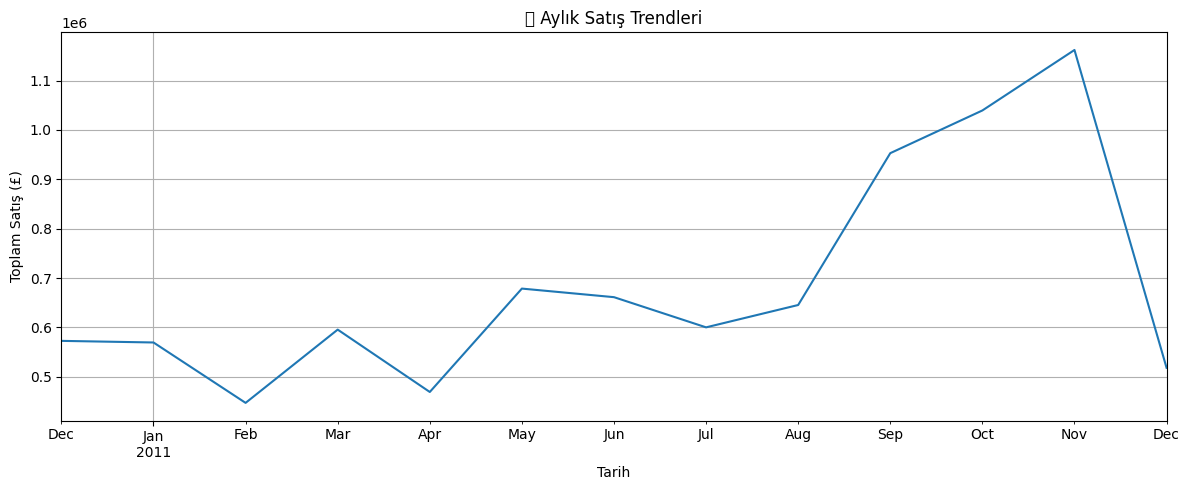

In [17]:
monthly_sales = df_clean.groupby('YearMonth')['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(12,5), title='📈 Aylık Satış Trendleri')
plt.ylabel("Toplam Satış (£)")
plt.xlabel("Tarih")
plt.grid(True)
plt.tight_layout()
plt.show()

## Güne göre satış yoğunluğu (haftanın günü)

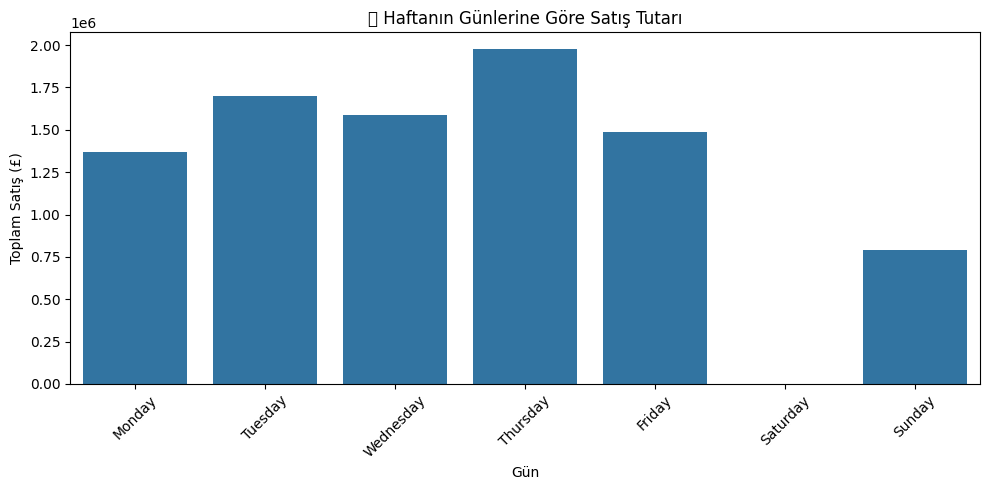

In [18]:
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df_clean.groupby('DayOfWeek')['TotalPrice'].sum().reindex(ordered_days)

plt.figure(figsize=(10,5))
sns.barplot(x=day_sales.index, y=day_sales.values)
plt.title("🗓️ Haftanın Günlerine Göre Satış Tutarı")
plt.ylabel("Toplam Satış (£)")
plt.xlabel("Gün")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df_clean[df_clean['DayOfWeek'] == 'Saturday'].shape[0]

0

In [20]:
df_clean['DayOfWeek'].value_counts()

,count
DayOfWeek,
Thursday,80035
Wednesday,68885
Tuesday,66473
Monday,64893
Sunday,62773
Friday,54825


## Saatlik satış analizi (günün hangi saatinde satış daha çok?)

<Axes: title={'center': 'Saatlik Satış Yoğunluğu'}, xlabel='Hour'>

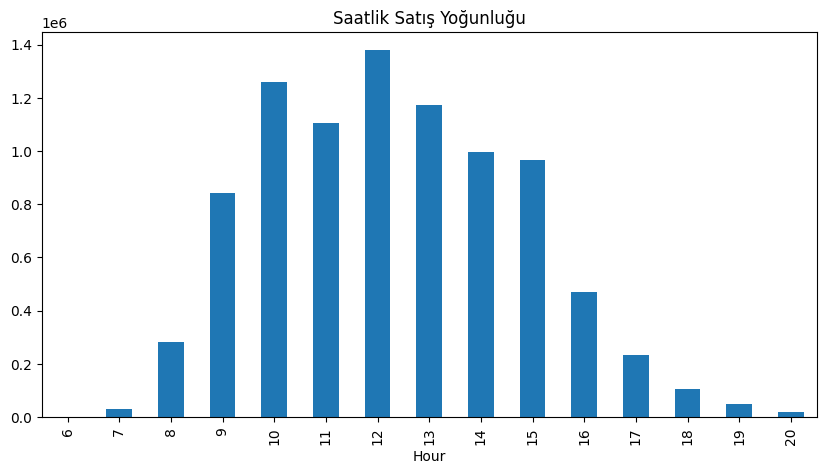

In [21]:
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', title='Saatlik Satış Yoğunluğu', figsize=(10,5))

# 📦 C. Ürün Bazlı Analiz

Ürünlerin satış miktarları ve kazandırdıkları gelirler analiz edilerek en çok tercih edilen ürünler belirlenmiştir.


## En Çok Satılan 10 Ürün (Quantity bazlı)

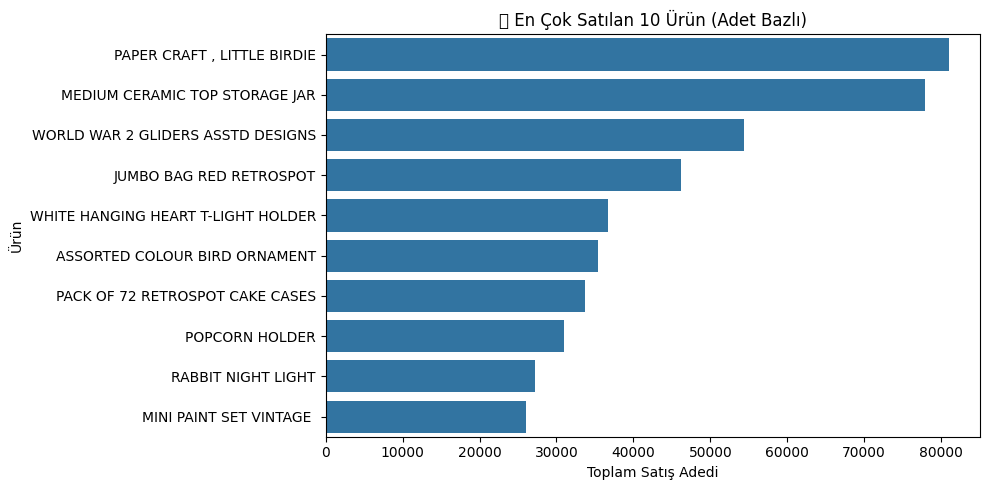

In [22]:
top_quantity = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_quantity.values, y=top_quantity.index)
plt.title("🔝 En Çok Satılan 10 Ürün (Adet Bazlı)")
plt.xlabel("Toplam Satış Adedi")
plt.ylabel("Ürün")
plt.tight_layout()
plt.show()

## En Çok Gelir Getiren 10 Ürün (TotalPrice bazlı)

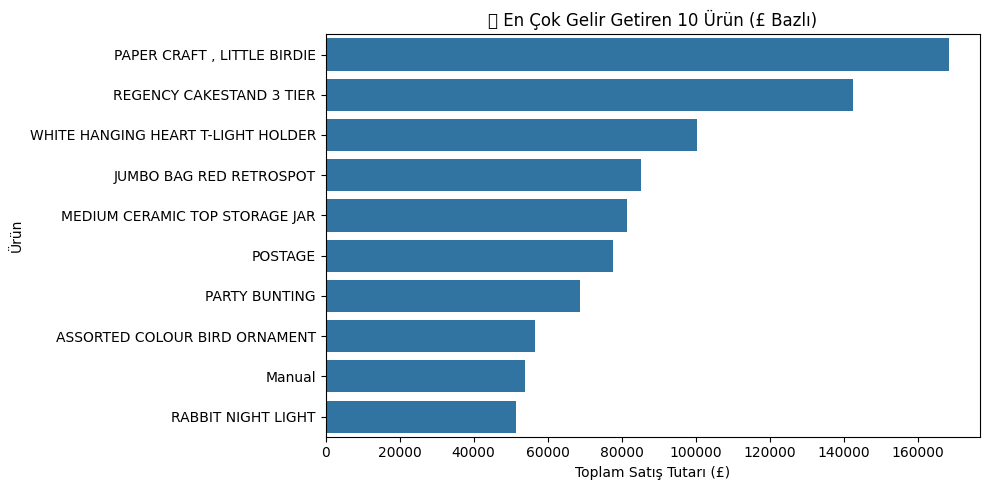

In [23]:
top_revenue = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_revenue.values, y=top_revenue.index)
plt.title("💰 En Çok Gelir Getiren 10 Ürün (£ Bazlı)")
plt.xlabel("Toplam Satış Tutarı (£)")
plt.ylabel("Ürün")
plt.tight_layout()
plt.show()

# 👥 D. Müşteri Analizi

Müşteri başına harcama, sipariş sayısı ve ortalama sepet değerleri hesaplanarak müşteri davranışları analiz edilmiştir.


## En Çok Alışveriş Yapan 10 Müşteri (Toplam Satış Tutarına Göre)

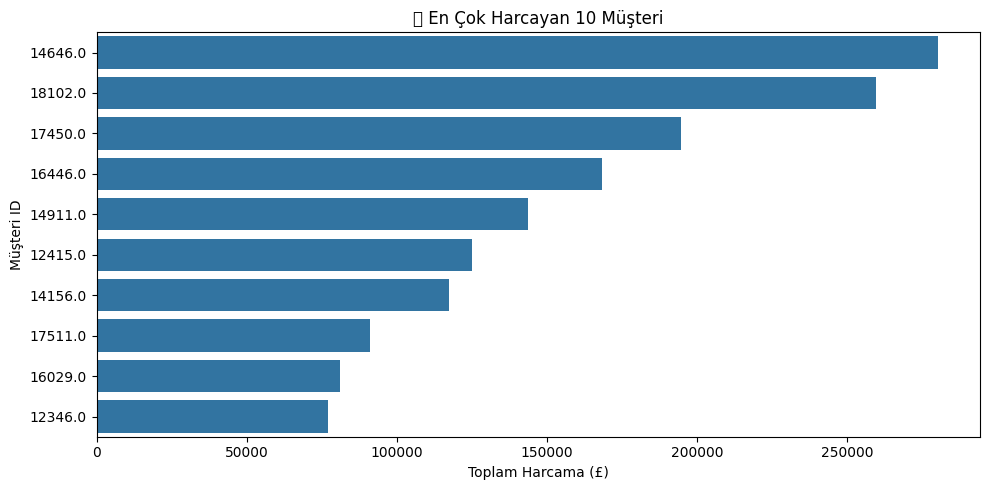

In [24]:
top_customers = df_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("💼 En Çok Harcayan 10 Müşteri")
plt.xlabel("Toplam Harcama (£)")
plt.ylabel("Müşteri ID")
plt.tight_layout()
plt.show()

## Müşteri Başına Ortalama Sipariş Tutarı

In [25]:
avg_order = df_clean.groupby('CustomerID')['TotalPrice'].mean().sort_values(ascending=False)

print("🎯 Müşteri başına ortalama sipariş tutarı (ilk 5):")
display(avg_order.head())

🎯 Müşteri başına ortalama sipariş tutarı (ilk 5):


,TotalPrice
CustomerID,
12346.0,77183.60
16446.0,56157.50
15098.0,13305.50
15749.0,4453.43
15195.0,3861.00


## Müşteri Başına Sipariş Sayısı

In [26]:
order_count = df_clean.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

print("📦 En çok sipariş veren 5 müşteri:")
display(order_count.head())

📦 En çok sipariş veren 5 müşteri:


,InvoiceNo
CustomerID,
12748.0,209
14911.0,201
17841.0,124
13089.0,97
14606.0,93


## Müşteri Başına Ortalama Sepet Değeri

In [27]:
avg_basket_value = (df_clean.groupby('CustomerID')['TotalPrice'].sum() /
                    df_clean.groupby('CustomerID')['InvoiceNo'].nunique()).sort_values(ascending=False)

print("🛒 En yüksek ortalama sepet değerine sahip 5 müşteri:")
display(avg_basket_value.head())

🛒 En yüksek ortalama sepet değerine sahip 5 müşteri:


,0
CustomerID,
16446.0,84236.250000
12346.0,77183.600000
15749.0,14844.766667
15098.0,13305.500000
12357.0,6207.670000


# 🔁 E. İade Analizi

Negatif miktarlı işlemler analiz edilerek en çok iade edilen ürünler, en çok iade yapan müşteriler ve toplam iade oranı hesaplanmıştır.


In [28]:
df_valid = df.dropna(subset=['CustomerID', 'Description'])
df_returns = df_valid[df_valid['Quantity'] < 0].copy()
df_returns['TotalPrice'] = df_returns['Quantity'] * df_returns['UnitPrice']

## Topam İade Tutarı ve Oranı

In [29]:
total_return_amount = df_returns['TotalPrice'].sum()
total_sales_amount = df_clean['TotalPrice'].sum()

return_rate = abs(total_return_amount) / total_sales_amount * 100

print(f"💸 Toplam iade edilen tutar: £{total_return_amount:,.2f}")
print(f"📊 İade oranı (satışa göre): %{return_rate:.2f}")

💸 Toplam iade edilen tutar: £-611,342.09
📊 İade oranı (satışa göre): %6.86


## En Çok İade Edilen Ürünler

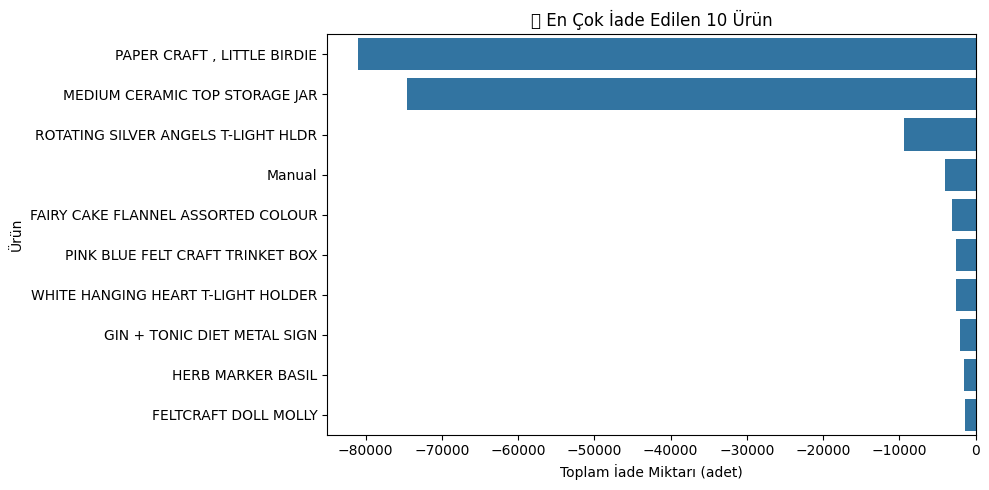

In [30]:
top_returned_products = df_returns.groupby('Description')['Quantity'].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_returned_products.values, y=top_returned_products.index)
plt.title("🔙 En Çok İade Edilen 10 Ürün")
plt.xlabel("Toplam İade Miktarı (adet)")
plt.ylabel("Ürün")
plt.tight_layout()
plt.show()

## En Çok İade Yapan Müşteriler

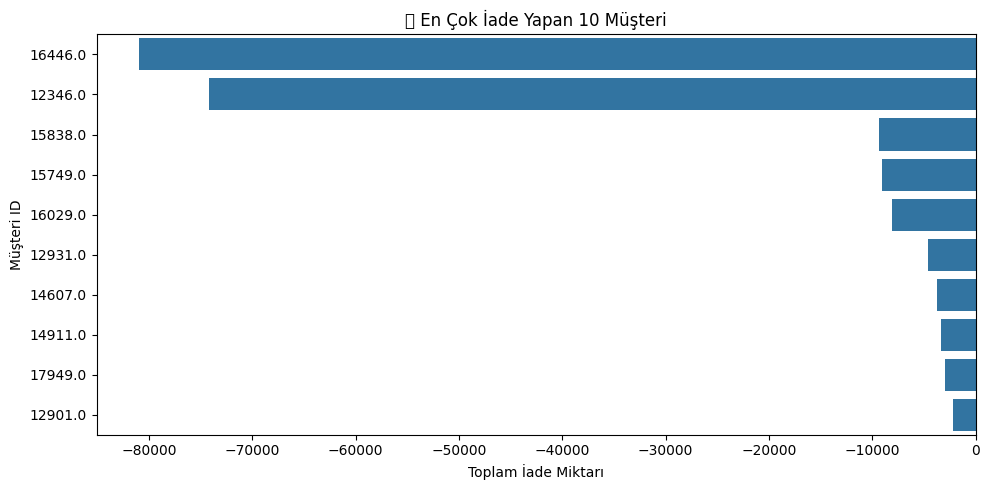

In [31]:
top_return_customers = df_returns.groupby('CustomerID')['Quantity'].sum().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_return_customers.values, y=top_return_customers.index.astype(str))
plt.title("👤 En Çok İade Yapan 10 Müşteri")
plt.xlabel("Toplam İade Miktarı")
plt.ylabel("Müşteri ID")
plt.tight_layout()
plt.show()